<a href="https://colab.research.google.com/github/pthnhan/DS_KHTN_TimeSeries/blob/main/h.w/TimeSeriesAnalysisAndForcasting_Wiley/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2.2**

**Consider the data on US production of blue and gorgonzola cheeses in Table B.4.**

**a. Find the sample autocorrelation function and the variogram for these data. Is the time series stationary or nonstationary?**

**b. Take the first difference of the time series, then find the sample autocorrelation function and the variogram. What conclusions can you draw about the structure and behavior of the time series?**


In [144]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, acf, plot_pacf
!pip install scikit-gstat
import skgstat as skg

In [161]:
data = pd.read_excel("https://github.com/pthnhan/DS_KHTN_TimeSeries/blob/main/data/Time%20Series%20and%20Forecasting%20Appendix%20B%20Tables.xls?raw=true", sheet_name='B.4-BLUE', header = 3)
display(data.shape)
data


(48, 2)

,Year,"Production, thousand lbs"
0,1950,7657
1,1951,5451
2,1952,10883
3,1953,9554
4,1954,9519
5,1955,10047
6,1956,10663
7,1957,10864
8,1958,11447
9,1959,12710


**a.**

**ACF**

   Lags       ACF
0     0  1.000000
1     1  0.922558
2     2  0.850245
3     3  0.799690
4     4  0.743290
5     5  0.692632
6     6  0.646648
7     7  0.592099
8     8  0.526477
9     9  0.465218


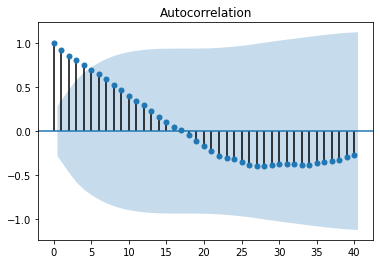

In [156]:
acf = sm.tsa.stattools.acf(data['Production, thousand lbs'], nlags = len(data)-1, fft=False)
lags = range(len(acf))
acf_series = pd.DataFrame(list(zip(lags, acf)), columns=["Lags", "ACF"])
print(acf_series.head(10))
plot_acf(data['Production, thousand lbs'], lags=40)
plt.show()

**Variogram**

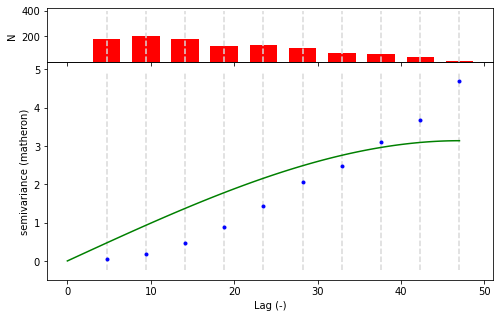

In [157]:
variogram = skg.Variogram(data['Year'].tolist(), data['Production, thousand lbs'].tolist())
variogram.plot()
plt.show()

**b.**

**Take the first difference of the time series**

In [158]:
data.index = data['Year']
dt = data.drop('Year', axis = 1)
data_firstdiff = dt.diff().dropna()
data_firstdiff

,"Production, thousand lbs"
Year,
1951,-2206.0
1952,5432.0
1953,-1329.0
1954,-35.0
1955,528.0
1956,616.0
1957,201.0
1958,583.0
1959,1263.0


**ACF**

   Lags       ACF
0     0  1.000000
1     1 -0.068287
2     2 -0.055488
3     3 -0.075906
4     4  0.036183
5     5 -0.209836
6     6  0.092986
7     7  0.012633
8     8 -0.008009
9     9 -0.182479


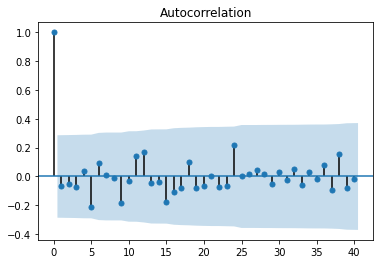

In [162]:
acf_firstdiff = sm.tsa.stattools.acf(data_firstdiff['Production, thousand lbs'], nlags = len(data_firstdiff)-1,fft=False)
lags_firstdiff = range(len(acf_firstdiff))
acf_firstdiff_series = pd.DataFrame(list(zip(lags_firstdiff, acf_firstdiff)), columns=["Lags", "ACF"])
print(acf_firstdiff_series.head(10))
plot_acf(data_firstdiff['Production, thousand lbs'], lags=40)
plt.show()

**Variogram**

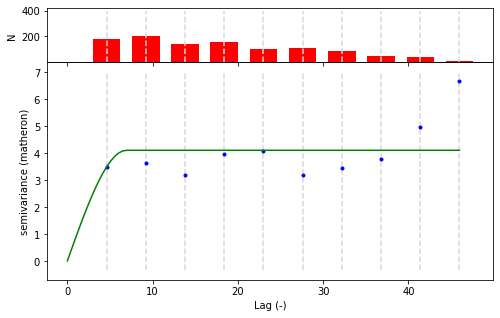

In [160]:
data_firstdiff = data_firstdiff.reset_index()
variogram_firstdiff = skg.Variogram(data_firstdiff['Year'].tolist(), data_firstdiff['Production, thousand lbs'].tolist())
variogram_firstdiff.plot()
plt.show()